<a href="https://www.kaggle.com/code/atanurgl/mldiamondsvm?scriptVersionId=271356008" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [2]:
df = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df = df.drop("Unnamed: 0" , axis=1)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df[df["z"]==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [11]:
len(df[df["x"]==0]) , len(df[df["y"]==0]) , len(df[df["z"]==0]) 

(8, 7, 20)

In [12]:
df= df.drop(df[df["z"]==0].index)
df= df.drop(df[df["y"]==0].index)
df= df.drop(df[df["x"]==0].index)

In [13]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
df.shape

(53920, 10)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

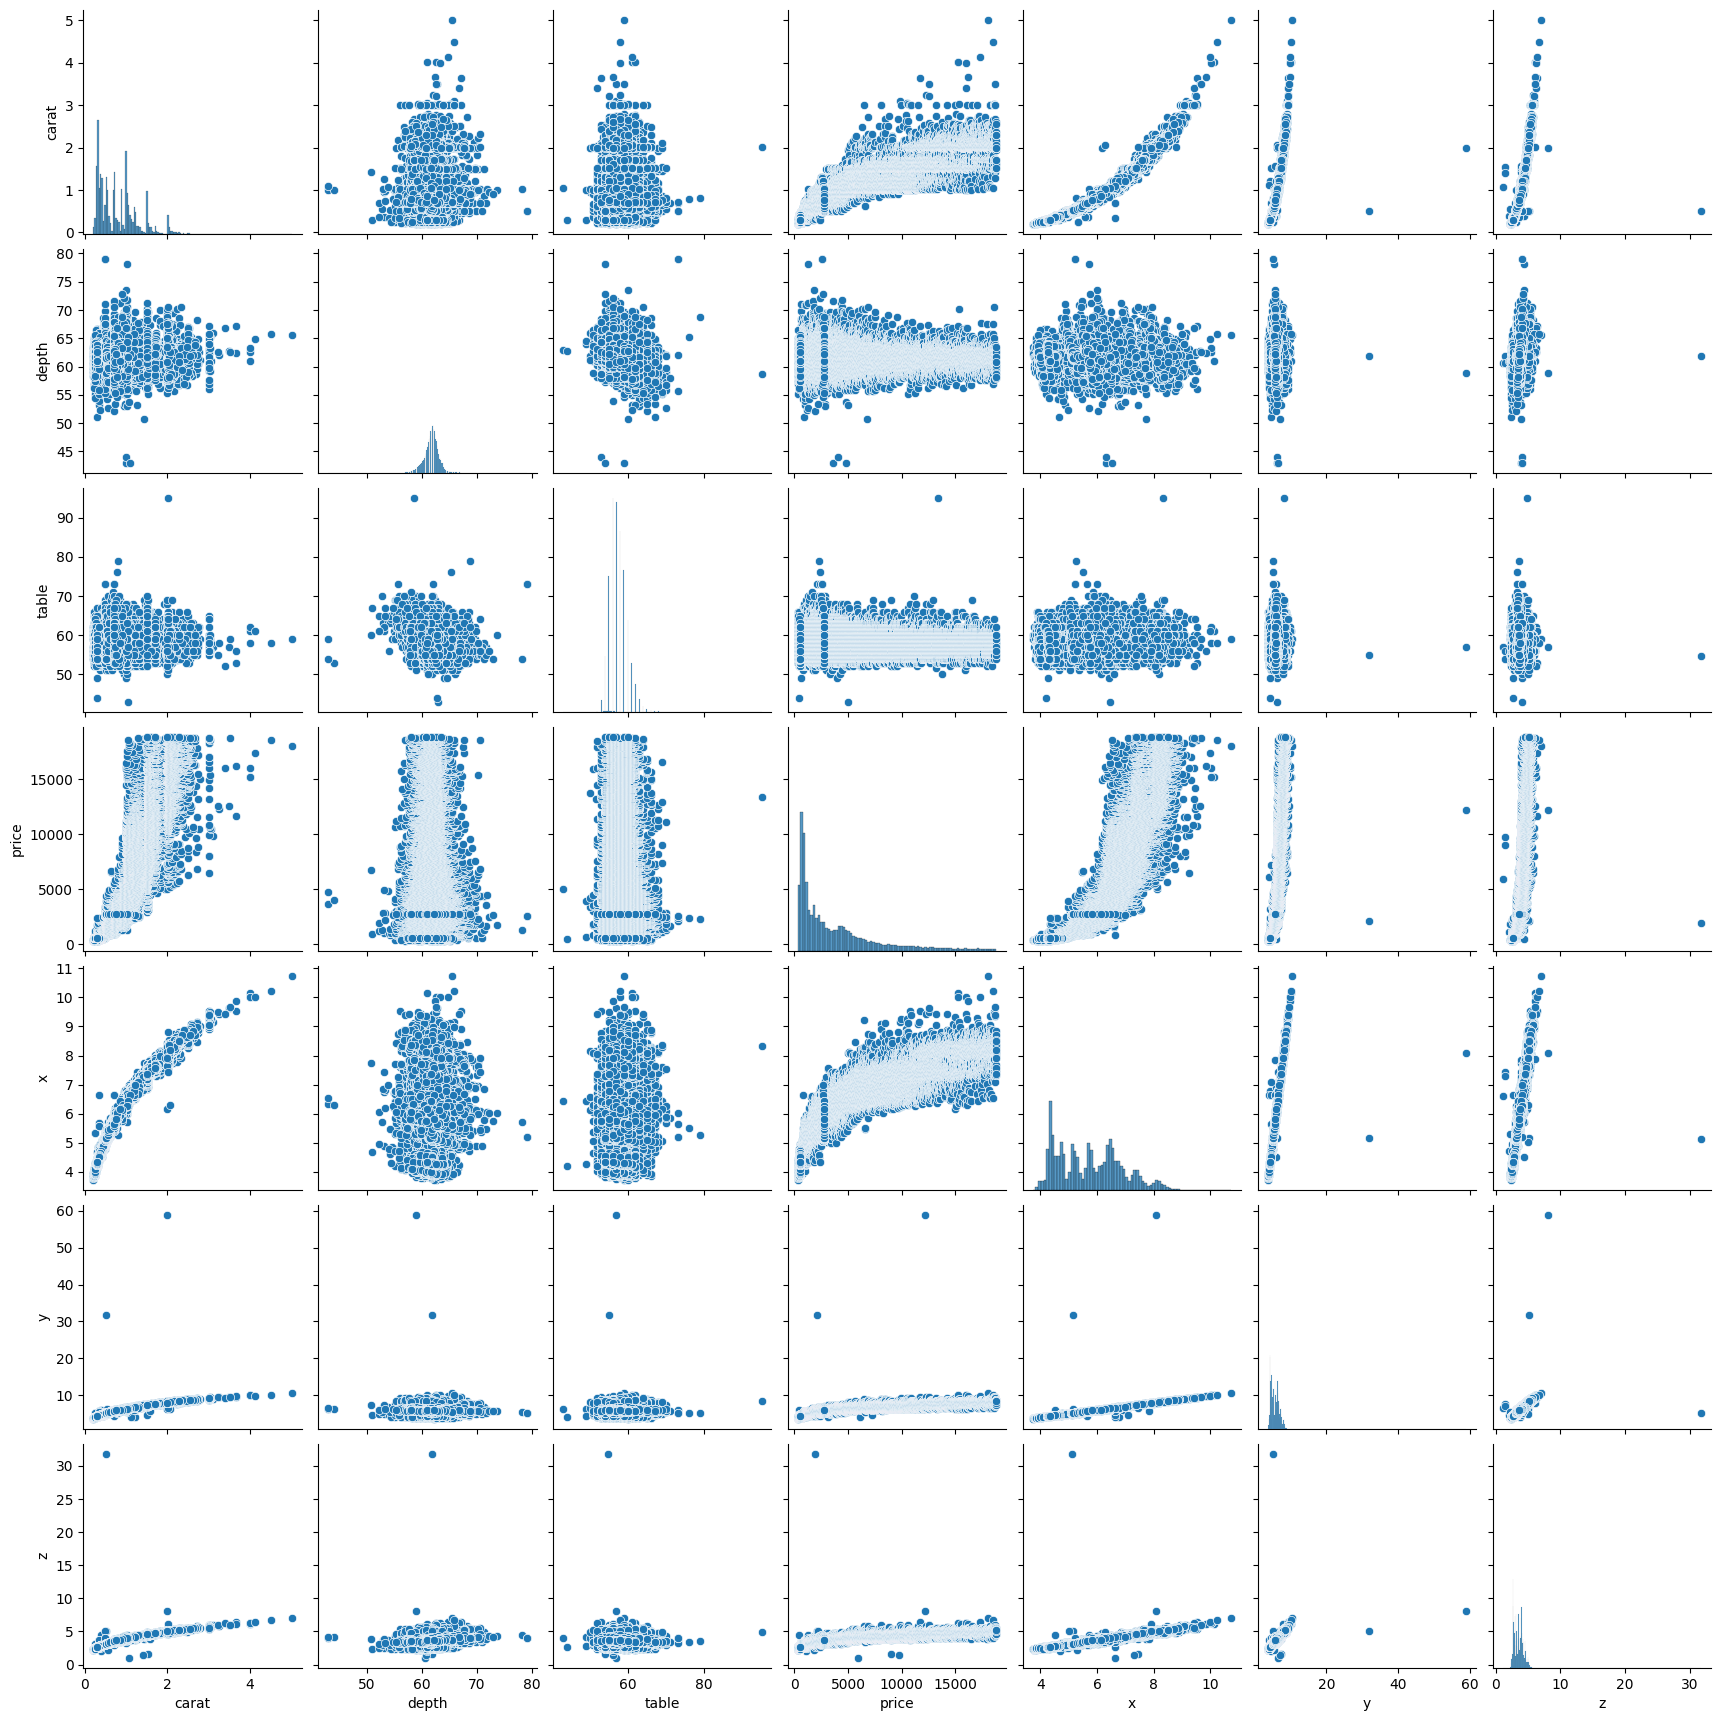

In [15]:
sns.pairplot(df)
plt.show()

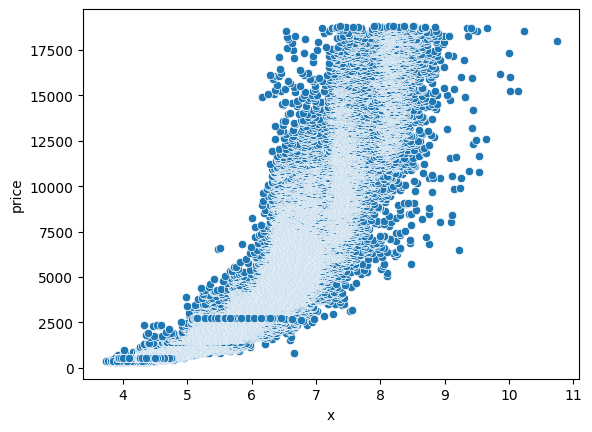

In [16]:
sns.scatterplot(x=df["x"],y=df["price"])
plt.show()

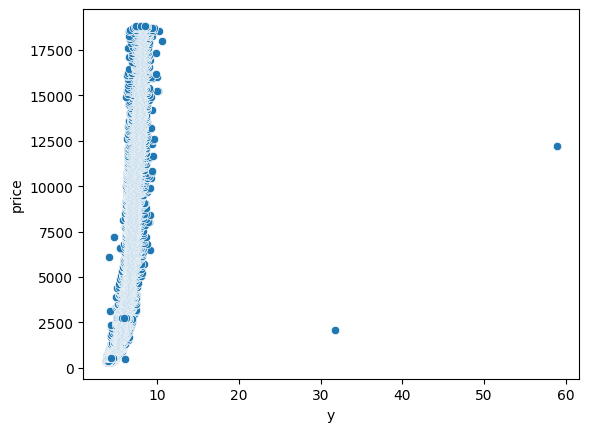

In [17]:
sns.scatterplot(x=df["y"],y=df["price"])
plt.show()

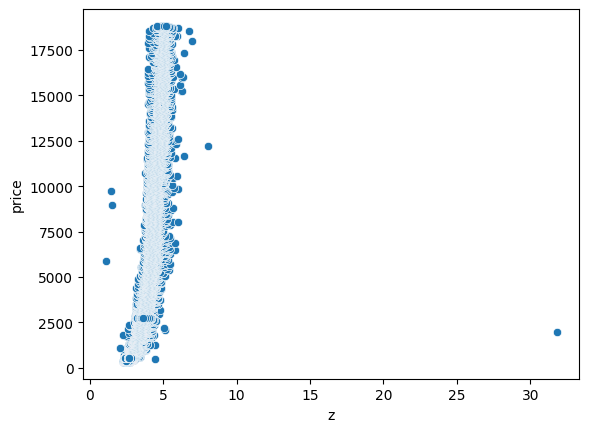

In [18]:
sns.scatterplot(x=df["z"],y=df["price"])
plt.show()

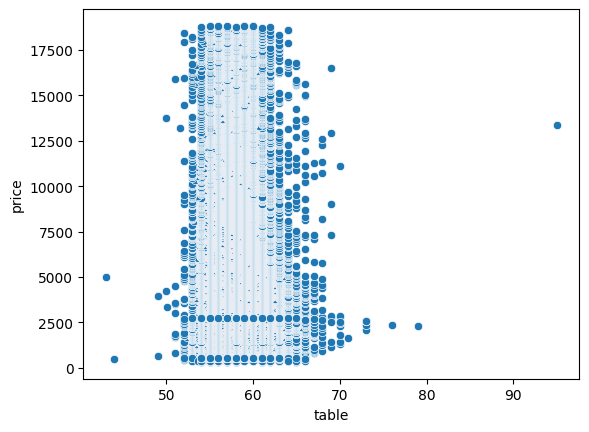

In [19]:
sns.scatterplot(x=df["table"],y=df["price"])
plt.show()

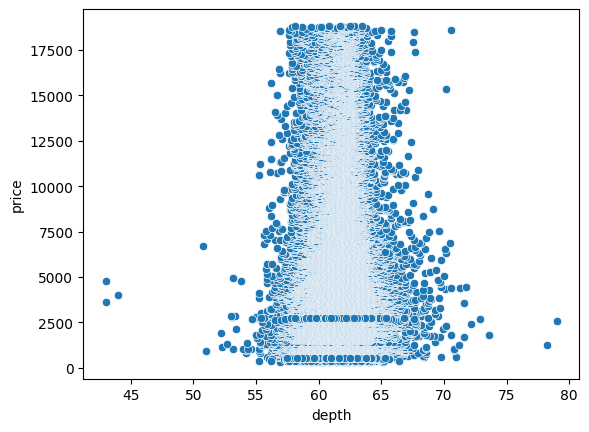

In [20]:
sns.scatterplot(x=df["depth"],y=df["price"])
plt.show()

In [21]:
len(df[(df["depth"]<75)&(df["depth"]>45)]) , len(df[(df["table"]<75)&(df["table"]>40)]) ,len(df[(df["z"]<30)&(df["z"]>2)]) , len(df[(df["y"]<20)])





(53914, 53917, 53916, 53918)

In [22]:
df[(df["y"]<20)]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [23]:
df.shape

(53920, 10)

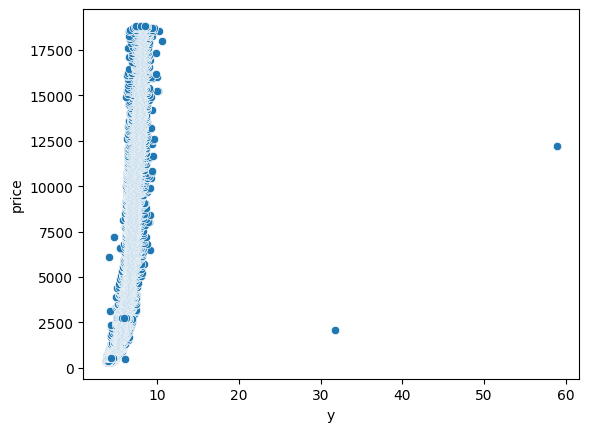

In [24]:
sns.scatterplot(x=df["y"],y=df["price"])
plt.show()

In [25]:
df= df[(df["depth"]<75)&(df["depth"]>45)]
df= df[(df["table"]<75)&(df["table"]>40)]
df= df[(df["z"]<30)&(df["z"]>2)]
df= df[(df["y"]<20)]

In [26]:
df.shape

(53905, 10)

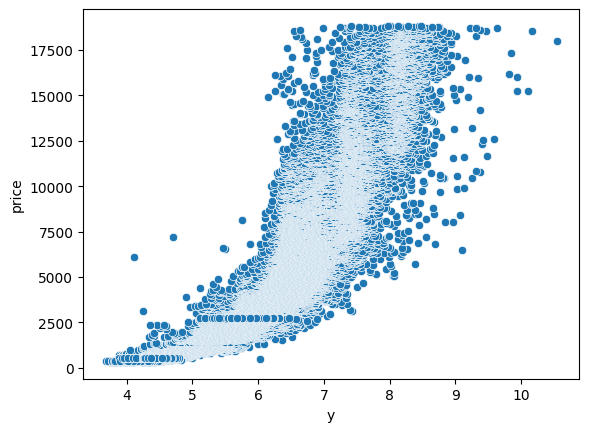

In [27]:
sns.scatterplot(x=df["y"],y=df["price"])
plt.show()

In [28]:
df["cut"].value_counts()

cut
Ideal        21543
Premium      13779
Very Good    12080
Good          4902
Fair          1601
Name: count, dtype: int64

In [29]:
df["color"].value_counts()

color
G    11281
E     9792
F     9535
H     8296
D     6774
I     5420
J     2807
Name: count, dtype: int64

In [30]:
df["clarity"].value_counts()

clarity
SI1     13058
VS2     12250
SI2      9183
VS1      8167
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: count, dtype: int64

In [31]:
X=df.drop("price",axis=1)
y=df["price"]

X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label_encoder = LabelEncoder()

In [36]:
for col in ["cut","color","clarity"]:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
15200,1.15,2,4,2,62.4,54.0,6.71,6.76,4.20
14632,1.11,3,1,2,61.3,58.0,6.66,6.61,4.07
19151,1.21,1,2,5,63.7,58.0,6.67,6.71,4.26
29299,0.30,2,5,5,61.5,58.0,4.28,4.31,2.64
9983,1.00,4,2,2,63.1,57.0,6.37,6.33,4.01


In [37]:
X_train["cut"].value_counts()

cut
2    16164
3    10371
4     9018
1     3684
0     1191
Name: count, dtype: int64

In [38]:
X_test["cut"].value_counts()

cut
2    5379
3    3408
4    3062
1    1218
0     410
Name: count, dtype: int64

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40428 entries, 15200 to 7630
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40428 non-null  float64
 1   cut      40428 non-null  int64  
 2   color    40428 non-null  int64  
 3   clarity  40428 non-null  int64  
 4   depth    40428 non-null  float64
 5   table    40428 non-null  float64
 6   x        40428 non-null  float64
 7   y        40428 non-null  float64
 8   z        40428 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.1 MB


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

In [43]:
linear = LinearRegression()

Mean Absolute Error :  867.7716773299007
Mean Squared Error :  1849507.2709594546
R2 Score :  0.8848902306205189


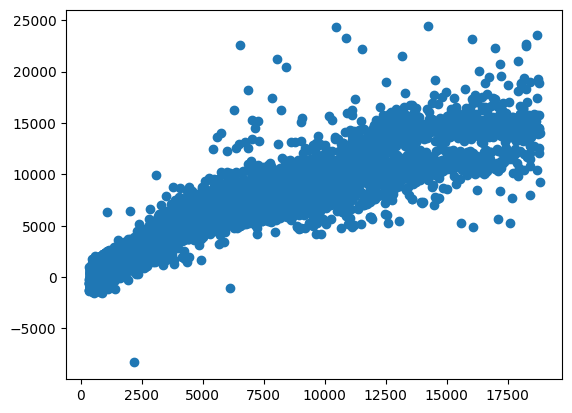

In [44]:
linear.fit(X_train_scaled,y_train)
y_pred = linear.predict(X_test_scaled)

mae= mean_absolute_error(y_test ,y_pred )
mse= mean_squared_error(y_test ,y_pred )
r2= r2_score(y_test , y_pred)

print("Mean Absolute Error : " , mae)
print("Mean Squared Error : " , mse)
print("R2 Score : " , r2)

plt.scatter(y_test,y_pred)
plt.show()

In [45]:
from sklearn.svm import SVR

Mean Absolute Error :  1397.853335232954
Mean Squared Error :  8151981.896752332
R2 Score :  0.4926363519327641


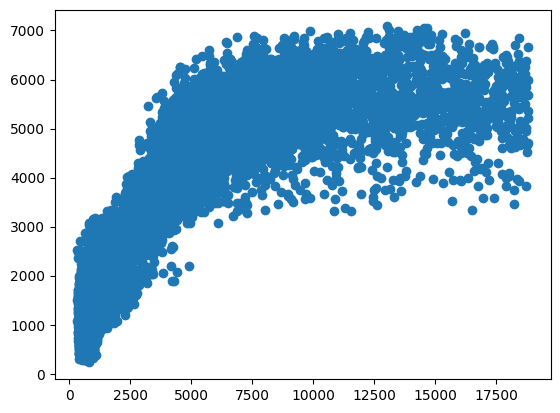

In [46]:
svr = SVR()
svr.fit(X_train_scaled,y_train)
y_pred = svr.predict(X_test_scaled)

mae= mean_absolute_error(y_test,y_pred )
mse= mean_squared_error( y_test,y_pred )
r2= r2_score( y_test,y_pred)

print("Mean Absolute Error : " , mae)
print("Mean Squared Error : " , mse)
print("R2 Score : " , r2)

plt.scatter(y_test,y_pred)
plt.show()

In [47]:
#hypermeter

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {
    "kernel": ["linear","rbf"] ,
    "C" : [0.1,1,10,100,1000] , 
    "gamma" : [1,0.1,0.001]
    
}

In [50]:
grid = GridSearchCV(estimator = SVR(), param_grid=param_grid , n_jobs=-1 , verbose=3 )

In [51]:
grid.fit(X_train_scaled , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)